# Word type embeddings from neural networks

Word type embeddings computed using Word2vec, GLoVE or fasttext are convenient because:
* they are generally faster to compute than count-based spaces
* pre-computed embeddings from large data are freely available
* there is good support through Python packages


## Pre-computed semantic spaces in gensim

The Python package *gensim* comes with several pre-computed distributonal spaces, as well as methods for working with these spaces. Here is how to access them:

In [1]:
import gensim.downloader as gensim_api

# what corpora and pre-trained models does gensim have?
# if we get the whole info, it's not easy to read
gensim_info = gensim_api.info()

# uncomment this to get a deluge of text
# print(gensim_info)

In [2]:
# What info() returns is in fact a dictionary with two entries: 
# corpora, and models
print("Two types of information in the gensim downloader:")
for infotype in gensim_info.keys():
    print("\t", infotype)


Two types of information in the gensim downloader:
	 corpora
	 models


In [3]:
# Let's look in 'models'. This is, again, a dictionary, where the
# keys are model labels
print("Gensim has the following models")
for modelname in gensim_info["models"].keys():
    print(modelname)


Gensim has the following models
fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [4]:
# The entry for each model is, again, a dictionary.
# Let's look at one
print("Info for glove-wiki-gigaword-300:")
for entry, value in gensim_info["models"]["glove-wiki-gigaword-300"].items():
    print(entry, ":", value)


Info for glove-wiki-gigaword-300:
num_records : 400000
file_size : 394362229
base_dataset : Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)
reader_code : https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py
license : http://opendatacommons.org/licenses/pddl/
parameters : {'dimension': 300}
description : Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).
preprocessing : Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.
read_more : ['https://nlp.stanford.edu/projects/glove/', 'https://nlp.stanford.edu/pubs/glove.pdf']
checksum : 29e9329ac2241937d55b852e8284e89b
file_name : glove-wiki-gigaword-300.gz
parts : 1


In [5]:
# The gensim datasets differ in their sizes.
# This is relevant when you want to choose one for download,
# as the large ones may be too big to use. 
# Here are the sizes:
print("Sizes of all models available with gensim:")

for modelname in gensim_info["models"].keys():
    if "file_size" in gensim_info["models"][modelname]:
        print(modelname, "\tsize: ", end= "")
        print(int(gensim_info["models"][modelname]["file_size"])/1000000, "M")


Sizes of all models available with gensim:
fasttext-wiki-news-subwords-300 	size: 1005.007116 M
conceptnet-numberbatch-17-06-300 	size: 1225.497562 M
word2vec-ruscorpora-300 	size: 208.427381 M
word2vec-google-news-300 	size: 1743.56384 M
glove-wiki-gigaword-50 	size: 69.182535 M
glove-wiki-gigaword-100 	size: 134.300434 M
glove-wiki-gigaword-200 	size: 264.336934 M
glove-wiki-gigaword-300 	size: 394.362229 M
glove-twitter-25 	size: 109.885004 M
glove-twitter-50 	size: 209.216938 M
glove-twitter-100 	size: 405.932991 M
glove-twitter-200 	size: 795.3731 M


In [6]:
###
# We now load one space. 
# Spaces differ in size, but also in the data on which they were trained.
# 
# I've chosen a mid-size one to get reasonable performance
# with not too gigantic a download,
# and I've chosen one trained on Wikipedia, which should give
# you a nice variety of contexts, along with gigaword,
# which is all news.
# 
# Feel free to choose a different space
# if this one is too slow to load on your machine --
# but note that your results will be slightly different
# than the ones I demonstrate. 
space = gensim_api.load("glove-wiki-gigaword-300")

### Using gensim's functions for exploring the space

We can now inspect the embedding / the vector / the coordinates that this space has for a target word, like this:

In [7]:
# you can get direct access to the vector associated with each word
# using straight brackets, as if the space was a dictionary:
space["amiable"]


array([-2.2541e-01,  3.9245e-02, -5.0450e-02, -1.8675e-01,  1.1354e-01,
        6.5802e-02,  3.9057e-02, -3.4870e-01,  1.6906e-01,  1.1843e-01,
       -9.0627e-02,  1.4391e-01, -4.4182e-01, -5.3203e-01, -3.7712e-01,
        2.2891e-01, -9.4016e-02,  4.5197e-03, -8.2949e-02,  1.4225e-01,
       -3.9489e-02,  5.9168e-01,  1.0723e-01,  4.9680e-01, -1.8976e-01,
       -1.8070e-01,  1.8460e-01, -2.7845e-01,  2.0893e-01, -3.4110e-02,
       -3.5694e-01, -1.0430e-01, -1.4370e-01,  3.9369e-02,  2.6469e-01,
        5.1050e-01,  2.2678e-01, -2.5711e-01, -3.8650e-01,  4.0672e-02,
        1.3131e-01,  5.0217e-02, -9.5307e-02, -1.5870e-01, -3.0679e-01,
        3.2927e-01,  3.1820e-01, -1.0922e-01, -1.3237e-02, -3.2883e-02,
        1.6459e-01, -2.3211e-01,  6.7338e-02,  2.5605e-01,  4.7802e-01,
        2.7384e-01, -2.7832e-02, -1.9969e-01,  4.3772e-01, -2.5280e-01,
        5.4337e-01, -2.0514e-01,  4.3163e-01, -2.1510e-01, -1.4490e-01,
        5.5399e-02,  3.0595e-01,  1.7990e-01,  2.4180e-01,  7.96

In [8]:
# what kind of thing is this object we call space?

type(space)

gensim.models.keyedvectors.KeyedVectors

### Cosine similarity and nearest neighbors in gensim

Gensim comes with a function that computes cosine similarity (higher = more similar) between word vectors:

In [9]:
# computing cosine similarity
print("amiable vs grouchy", space.similarity("amiable", "grouchy"))
print("amiable vs affable", space.similarity("amiable", "affable"))
print("amiable vs obliging", space.similarity("amiable", "obliging"))

amiable vs grouchy 0.36090654
amiable vs affable 0.812942
amiable vs obliging 0.26450017


The nearest neighbors of a target word are the other words in our inventory that have the highest cosine to the target. This characterizes the meaning of the word through its neighborhood in the semantic space.

In [10]:
print("neighborhood of 'amiable':")
for word, sim in space.most_similar("amiable"):
    print("\t", word, sim)
    
print("neighborhood of 'grouchy'")
for word, sim in space.most_similar("grouchy", topn = 20):
    print("\t", word, sim)

neighborhood of 'amiable':
	 affable 0.8129420280456543
	 genial 0.7653029561042786
	 easygoing 0.7628498077392578
	 unassuming 0.6801630258560181
	 jovial 0.6614009737968445
	 personable 0.657274067401886
	 likable 0.6463435292243958
	 unpretentious 0.6235607862472534
	 likeable 0.6146904826164246
	 congenial 0.6083606481552124
neighborhood of 'grouchy'
	 grumpy 0.5547721982002258
	 cranky 0.5063527226448059
	 dopey 0.4778646230697632
	 irascible 0.4405902624130249
	 cantankerous 0.4327520430088043
	 surly 0.4287707209587097
	 pompous 0.42816585302352905
	 irritable 0.42395249009132385
	 hunchbacked 0.4206606149673462
	 ornery 0.4193281829357147
	 uptight 0.41491711139678955
	 overprotective 0.41403964161872864
	 gruff 0.4137725234031677
	 smug 0.4087333679199219
	 snobbish 0.4077928364276886
	 voluble 0.4072340726852417
	 taciturn 0.40713146328926086
	 condescending 0.40333572030067444
	 haughty 0.39932018518447876
	 giggly 0.39813709259033203


### Visualization

If meaning is a space, can we look at its map, and see where the different words are located? Yes, and this is actually a very good way of looking at the semantic neighborhood of a word. Semantic spaces usually have many dimensions, 50 or more, which is not straightforwrad to visualize. So the standard way to go is to use *dimensionality reduction* and then visualize the first two resulting dimensions. Here is code that does this. It uses Principal Component Analysis (PCA) to do dimensionality reduction; another option is to use t-sne. (t-sne produces very pretty visualizations, but it can sometimes make them too pretty, producing clusters of points that look clearer than they are in the underlying data.)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

###
# function that visualizes the nearest neighbors of a given word.
# parameters:
# - word: central word whose neighborhood to visualize
# - space: gensim Word2VecKeyedVectors object, like the space object we 
#   made above
# - topn: number, how many nearest neighbors to include, default is 10
def pca_visualize_neighborhood(word, space, topn = 10):
    # determine the topn nearest neighbors of word
    words_and_sims = space.most_similar(word, topn = topn)
    
    # make a list of all the words to visualize:
    # central word plus nearest neighbors
    words = [ word ] + [w for w, s in words_and_sims]
    
    # put all the word vectors into one matrix
    word_vectors = np.array([space[w] for w in words])
    
    # use dimensionality reduction: 
    # Principal Component Analysis, PCA
    # keep the two first dimensions
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    # set up the canvas
    plt.figure(figsize=(6,6))
    # add a scatter plot of the two-D embeddings
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    # add each of the words to the plot, a bit above and to the right
    # of the 2-D dot it goes with
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

    # now show the canvas
    plt.show()
    


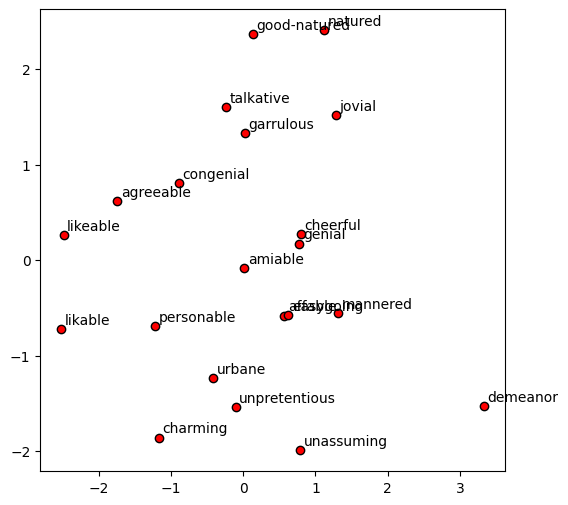

In [12]:
# let's test this visualization
pca_visualize_neighborhood("amiable",space, 20)


##  Computing a Word2vec space with gensim

Computing a prediction-based meaning space with gensim is very easy. 

We first again demonstrate the method with a tiny corpus:

In [13]:
sam_corpus = """I am Sam. Sam I am. I do not like green eggs and ham."""

# we split the corpus up into sentences
import nltk
sam_sents = nltk.sent_tokenize(sam_corpus)
sam_sents

['I am Sam.', 'Sam I am.', 'I do not like green eggs and ham.']

In [14]:
# Then we split each sentence up into words. 
# We now have a list of sentences, each of which is a list of words.
sam_sent_words = [ nltk.word_tokenize(s) for s in sam_sents]
sam_sent_words

[['I', 'am', 'Sam', '.'],
 ['Sam', 'I', 'am', '.'],
 ['I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', '.']]

In [15]:
# This is the format the gensim takes:
# a corpus that is a list of sentences,
# where each sentence is a list of words

from gensim.models import Word2Vec

# parameters: 
# corpus as a list of sentences,
# epochs: number of epochs, that is, number of times the
#   training goes through the whole corpus.
# min_count: minimum count for words to include. This
#   should be larger than 1, but the Sam corpus is so tiny 
#   that we keep all words
# sg: use the skipgram method
w2v_obj = Word2Vec(sam_sent_words, epochs = 10, min_count = 1,sg =1)
w2v_obj

In [16]:
# getting the actual space, and 
# getting a vector
space_sam = w2v_obj.wv
space_sam["Sam"]

array([ 9.4563962e-05,  3.0773198e-03, -6.8126451e-03, -1.3754654e-03,
        7.6685809e-03,  7.3464094e-03, -3.6732971e-03,  2.6427018e-03,
       -8.3171297e-03,  6.2054861e-03, -4.6373224e-03, -3.1641065e-03,
        9.3113566e-03,  8.7338570e-04,  7.4907029e-03, -6.0740625e-03,
        5.1605068e-03,  9.9228229e-03, -8.4573915e-03, -5.1356913e-03,
       -7.0648370e-03, -4.8626517e-03, -3.7785638e-03, -8.5361991e-03,
        7.9556061e-03, -4.8439382e-03,  8.4236134e-03,  5.2625705e-03,
       -6.5500261e-03,  3.9578713e-03,  5.4701497e-03, -7.4265362e-03,
       -7.4057197e-03, -2.4752307e-03, -8.6257253e-03, -1.5815723e-03,
       -4.0343284e-04,  3.2996845e-03,  1.4418805e-03, -8.8142155e-04,
       -5.5940580e-03,  1.7303658e-03, -8.9737179e-04,  6.7936908e-03,
        3.9735902e-03,  4.5294715e-03,  1.4343059e-03, -2.6998555e-03,
       -4.3668128e-03, -1.0320747e-03,  1.4370275e-03, -2.6460087e-03,
       -7.0737829e-03, -7.8053069e-03, -9.1217868e-03, -5.9351693e-03,
      

We now move to a corpus that is not quite so tiny, so we can demonstrate cosine similarity.

The Brown corpus, a corpus of 1 million words, is sampled from different genres. You can access its genres with the `categories` parameter, like this:

In [17]:
from nltk.corpus import brown

# The first three sentences of the Brown fiction section
list(brown.sents(categories="fiction"))[:3]

[['Thirty-three'],
 ['Scotty', 'did', 'not', 'go', 'back', 'to', 'school', '.'],
 ['His',
  'parents',
  'talked',
  'seriously',
  'and',
  'lengthily',
  'to',
  'their',
  'own',
  'doctor',
  'and',
  'to',
  'a',
  'specialist',
  'at',
  'the',
  'University',
  'Hospital',
  '--',
  'Mr.',
  'McKinley',
  'was',
  'entitled',
  'to',
  'a',
  'discount',
  'for',
  'members',
  'of',
  'his',
  'family',
  '--',
  'and',
  'it',
  'was',
  'decided',
  'it',
  'would',
  'be',
  'best',
  'for',
  'him',
  'to',
  'take',
  'the',
  'remainder',
  'of',
  'the',
  'term',
  'off',
  ',',
  'spend',
  'a',
  'lot',
  'of',
  'time',
  'in',
  'bed',
  'and',
  ',',
  'for',
  'the',
  'rest',
  ',',
  'do',
  'pretty',
  'much',
  'as',
  'he',
  'chose',
  '--',
  'provided',
  ',',
  'of',
  'course',
  ',',
  'he',
  'chose',
  'to',
  'do',
  'nothing',
  'too',
  'exciting',
  'or',
  'too',
  'debilitating',
  '.']]

The corpus is too small to give us good word vectors, but at least it is not tiny. It has 68,500 words:

In [18]:
len(list(brown.words(categories = "fiction")))

68488

We can use gensim's Word2Vec in exactly the same way here as with the Sam corpus: 

In [19]:
%%time
# The %%time command is not a python command, it's jupyter notebook-ese
# This will put a timer on how long it takes to compute the meaning space


# parameters: 
# corpus as a list of sentences,
# epochs: number of epochs, that is, number of times the
#   training goes through the whole corpus.
# min_count: minimum count for words to include. We set it to 10. 
#   10, 20, or maybe 50 for large corpora are reasonable numbers here.
# sg: use the skipgram method
# vector_size: number of dimensions to use
w2vec_fiction = Word2Vec(brown.sents(categories = "fiction"), epochs=10, min_count=10, vector_size=300, sg = 1)

CPU times: user 1.84 s, sys: 47.5 ms, total: 1.89 s
Wall time: 922 ms


What target words do we have in our space?

Note that we need the *wv*, for word-vectors, to access the gensim space functions you know. 

In [20]:
space = w2vec_fiction.wv

space.key_to_index.keys()

dict_keys([',', '.', 'the', 'and', 'to', 'of', 'a', 'was', 'in', 'he', 'his', 'had', '``', "''", '?', 'that', 'I', 'He', 'with', 'it', 'on', 'her', 'for', 'him', 'The', 'at', ';', 'as', 'not', 'would', '!', 'she', 'be', 'were', 'you', 'they', 'from', 'out', 'but', 'said', 'up', 'all', '--', 'them', 'about', 'one', 'or', 'could', 'have', 'by', 'their', 'been', 'an', 'there', 'It', 'like', 'into', 'this', 'She', 'is', 'me', 'when', 'no', 'down', 'what', 'which', 'my', 'did', 'so', 'man', 'who', 'back', 'now', 'time', 'over', 'if', 'came', 'But', 'some', 'do', 'we', ':', 'They', 'more', 'little', 'went', 'get', 'where', 'then', 'thought', 'know', 'old', 'only', 'And', 'before', 'looked', 'men', 'go', 'never', 'around', 'himself', 'There', 'two', 'again', 'room', 'way', 'off', 'made', 'His', 'eyes', 'here', 'through', 'knew', 'When', 'face', 'saw', 'A', 'too', 'felt', 'What', 'see', 'even', 'own', 'must', 'seemed', "don't", 'good', 'come', 'away', 'In', 'still', 'head', 'just', 'how', 'hou

We can now compute cosine similarity as before:

In [21]:
space.similarity("doctor", "family")

0.97253406

In [22]:
space.most_similar("woman")

[('young', 0.9826302528381348),
 ('whose', 0.9754039645195007),
 ('new', 0.9731448292732239),
 ('flesh', 0.9675564169883728),
 ('died', 0.9672748446464539),
 ('play', 0.9667861461639404),
 ('once', 0.96490877866745),
 ('death', 0.9642977714538574),
 ('years', 0.9636864066123962),
 ('part', 0.9629346132278442)]